# Watershed Boundaries by Hydrologic Unit Code (HUC)

### Overview
Watersheds are delineated by USGS using a [hydrologic unit code (HUC)](https://nas.er.usgs.gov/hucs.aspx). This provides national hydrologic boundaries. 

**Source:** [<u>Link to data</u>](https://prd-tnm.s3.amazonaws.com/index.html?prefix=StagedProducts/Hydrography/WBD/National/GDB/)

**Notebook Author:** Cassie Buhler


In [1]:
import os
import earthpy as et
import geopandas as gpd

#data url 
url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/WBD/National/GDB/WBD_National_GDB.zip'

# download data to your machine 
wbd_dir = et.data.get_data(url = url)
wbd_path = os.path.join(wbd_dir, f'WBD_National_GDB.gdb')

# read data
gdf = gpd.read_file(wbd_path, layer = 'WBDHU4', engine='pyogrio')

#print out data 
gdf 

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,huc4,name,globalid,shape_Length,shape_Area,geometry
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-08-16 11:24:24+00:00,1384150,13203421.45,53432.40,"NM,TX",1307,Lower Pecos,{A41C097B-67A1-416D-9C4B-5C79419D50F8},16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452..."
1,{ACA0AE30-DBB9-4247-9C7E-9B04B698288B},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-08-16 11:24:24+00:00,1385432,3372434.63,13647.77,"MX,TX",1309,Lower Rio Grande,{55FE0BC7-43F3-4227-A5EE-AC0F20828622},10.835984,1.232534,"MULTIPOLYGON (((-98.80212 26.95795, -98.79537 ..."
2,{06AFD216-7C75-4B14-A3FD-327ADC873FCD},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-08-16 11:24:24+00:00,1378770,18423392.00,74556.89,TX,1211,Nueces-Southwestern Texas Coastal,{16D89800-EE50-4243-A008-F42664FE5424},17.309713,6.844815,"MULTIPOLYGON (((-100.40903 30.12027, -100.4080..."
3,{0E918E79-0C68-4381-920B-3A08077F4ED3},{31AC21ED-1551-431B-963A-63D44B9887E8},None,U.S. Geological Survey,None,2022-01-02 20:20:35+00:00,None,8472484.56,34286.96,CA,1806,Central California Coastal,{359702D5-6061-47D0-B9DC-B477921BFA5E},16.125924,3.410020,"MULTIPOLYGON (((-122.11788 37.25462, -122.1175..."
4,{7E32DC94-E57D-4114-A4FA-8F91DCC89CC6},{93C374CC-EFFC-4F80-B73B-B02CB768ABCE},None,U.S. Geological Survey,None,2022-01-03 14:19:40+00:00,None,8861368.04,35860.72,"CA,MX",1807,Southern California Coastal,{E7C8A802-D2FA-440B-A9BF-9B8D0D0D1BD6},18.029736,3.484674,"MULTIPOLYGON (((-119.10906 34.82364, -119.1086..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,{403D50BA-AB23-4953-A9E3-88D309830AF8},None,None,None,None,2020-11-03 11:01:54+00:00,None,11534902.05,46680.13,"DE,MD,NJ,NY,PA,VA",0204,Delaware-Mid Atlantic Coastal,{0B0689F9-E42B-4307-ADCD-E828096CF5C2},23.613899,4.939448,"MULTIPOLYGON (((-74.59898 42.46011, -74.59866 ..."
241,{6F1A4B05-D4F4-4CCC-B2F6-3145111E2FA8},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-08-16 11:24:24+00:00,"970226,977426",4690028.03,18979.89,"CT,NJ,NY,RI",0203,Lower Hudson-Long Island,{D9A10A5D-54FE-44CC-B8E5-943E7548DE08},15.607259,2.027672,"MULTIPOLYGON (((-73.02556 41.21327, -73.02548 ..."
242,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},None,U.S. Geological Survey,None,2023-04-11 16:22:34+00:00,None,3103935.02,12561.19,"CT,MA,NY,RI",0110,Connecticut Coastal,{FC9F81F3-BF45-4AA7-A2F4-9750D62C0CEB},18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ..."
243,{05AAEB86-3323-432A-96BD-9CF1853E4FD3},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,None,2024-08-16 11:24:24+00:00,366218,814577.71,3296.48,HI,2009,Northwestern Hawaiian Islands,{A43171BA-394F-4EAB-811F-1F5AA41905A9},5.849827,0.297712,"MULTIPOLYGON (((-175.83911 27.99952, -175.8385..."


## Filtering data 
We want to look at watershed boundaries that overlap in South Dakota. To do so, we will filter the `States` column to only rows that contain `SD`.

In [2]:
filter_sd = gdf['states'].fillna('').str.contains('SD|WY',regex = True)
sd_gdf = gdf[filter_sd]

### Plotting data

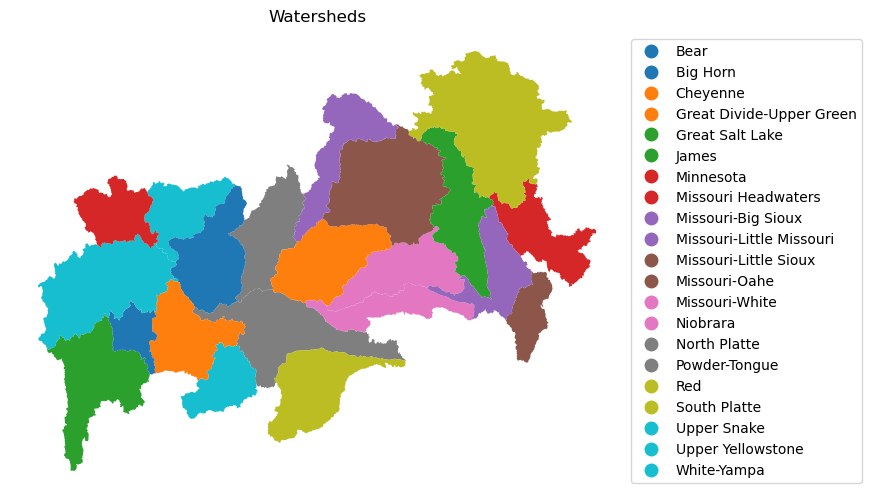

In [4]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 6))
sd_gdf.plot(ax=ax,column="name",legend = True,legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

# Add a title to your plot
ax.set(title="Watersheds")
ax.axis('off') #turning off x/y labels 

plt.show()